Latar Belakang dan Pernyataan Masalah

Sebuah perusahaan website building and hosting dari Amerika Serikat bernama SiteBuilder ingin bekerja sama dengan beberapa YouTube channel dalam mempromosikan produk mereka. Mereka ingin tahu profil video yang pernah trending di YouTube dan kategori video yang paling populer untuk membantu dalam pemilihan YouTube channel yang akan ditawarkan kolaborasi. Secara general, semakin populer sebuah channel, semakin tinggi reach-nya, sehingga dengan pemilihan yang tepat perusahaan dapat me-reach lebih banyak potential customers.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:
"Seperti apakah profil video yang populer di YouTube?"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Importing the files
usvideos = pd.read_csv('USvideos.csv')
uscat = pd.read_json('US_category_id.json')
display(usvideos)
display(uscat.head(),uscat.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


,kind,etag,items
27,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
28,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
29,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
30,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
31,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [4]:
# Dropping columns in usvideos irrelevant for the analysis
usvideos = usvideos.drop(['tags','thumbnail_link','description'],axis=1)
display(usvideos.head(),usvideos.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,False
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,False
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,False
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,5660813,192957,2846,13088,False,False,False
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,10306119,357079,212976,144795,False,False,False


In [5]:
# Dropping 'kind' and 'etag' columns from uscat since they are not needed for the analysis
uscat = uscat.drop(['kind','etag'],axis=1)
display(uscat.head(),uscat.tail())

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."


,items
27,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
28,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
29,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
30,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."
31,"{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [6]:
# Obtaining the category ID and names from uscat and storing it in a new DataFrame called new_uscat
id_vals = uscat['items'].apply(lambda x: x['id']).astype('int64').tolist()
title_vals = uscat['items'].apply(lambda x: x['snippet']['title']).tolist()

new_uscat = pd.DataFrame({'category_id': id_vals, 'category_name': title_vals})

display(new_uscat)

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [7]:
# Merging new_uscat with usvideos and naming the merged dataframes as new_usvideos
new_usvideos = pd.merge(usvideos, new_uscat, on='category_id', how='left')
display(new_usvideos)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,False,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,False,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,False,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,5660813,192957,2846,13088,False,False,False,Film & Animation


In [8]:
# Extract the years of trending for easier analysis
import re
new_usvideos['year_trending'] = new_usvideos['trending_date'].apply(lambda x: re.findall(r'^\d{2}', x)[0])
display(new_usvideos.head(), new_usvideos.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,year_trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False,People & Blogs,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False,Entertainment,17
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False,Comedy,17
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False,Entertainment,17
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False,Entertainment,17


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,year_trending
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,False,Pets & Animals,18
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,False,People & Blogs,18
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,False,Entertainment,18
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,5660813,192957,2846,13088,False,False,False,Film & Animation,18
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,10306119,357079,212976,144795,False,False,False,Gaming,18


In [9]:
# Checking for any missing values
new_usvideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   views                   40949 non-null  int64 
 7   likes                   40949 non-null  int64 
 8   dislikes                40949 non-null  int64 
 9   comment_count           40949 non-null  int64 
 10  comments_disabled       40949 non-null  bool  
 11  ratings_disabled        40949 non-null  bool  
 12  video_error_or_removed  40949 non-null  bool  
 13  category_name           40949 non-null  object
 14  year_trending           40949 non-null  object
dtypes:

In [10]:
# Checking for correct formatting in columns required for analysis
print(new_usvideos['year_trending'].unique())
print(pd.to_numeric(new_usvideos['views'], errors='coerce').notnull().all())
print(pd.to_numeric(new_usvideos['likes'], errors='coerce').notnull().all())
print(pd.to_numeric(new_usvideos['comment_count'], errors='coerce').notnull().all())

['17' '18']
True
True
True


In [11]:
# Checking for and removing duplicates
print(new_usvideos.duplicated().value_counts())
new_usvideos = new_usvideos.drop_duplicates()
display(new_usvideos.describe(), new_usvideos.describe(include='object'))

False    40901
True        48
dtype: int64


,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,category_name,year_trending
count,40901,40901,40901,40901,40901,40901,40901
unique,6351,205,6455,2207,6269,16,2
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,Entertainment,18
freq,29,200,29,202,50,9944,31301


KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9943694436453334, pvalue=0.0)
KstestResult(statistic=0.9770124891960661, pvalue=0.0)


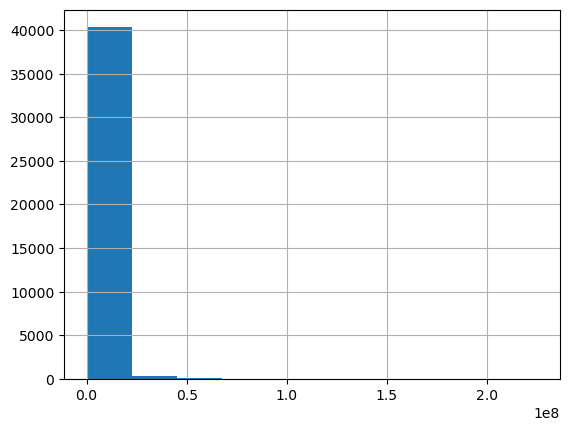

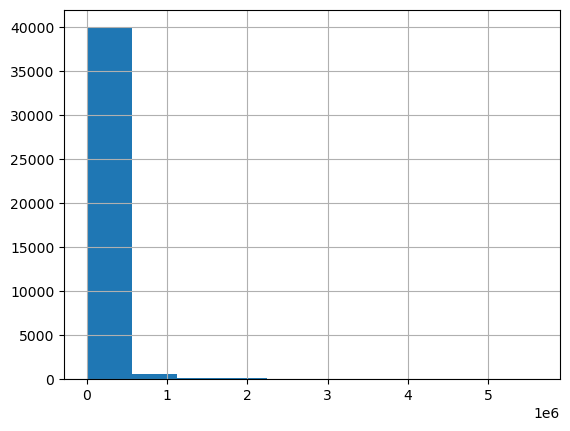

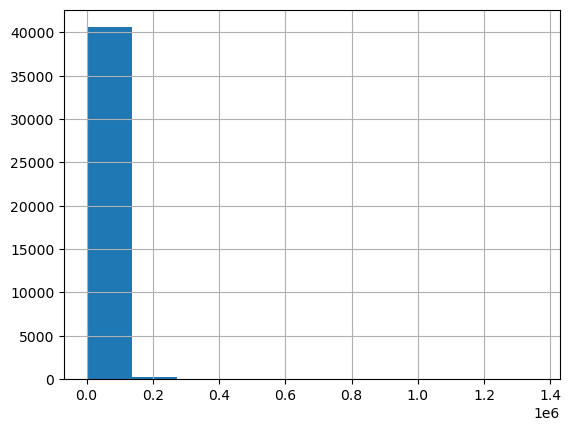

Columns views, likes, and comment_count are not normally distributed.


In [12]:
# Checking whether or not data is normally distributed

# KS test to test for normal distribution
from scipy.stats import kstest
from scipy.stats import lognorm
print(kstest(new_usvideos['views'],'norm'))
print(kstest(new_usvideos['likes'],'norm'))
print(kstest(new_usvideos['comment_count'],'norm'))

# Using a histogram to visually check distribution
new_usvideos['views'].hist()
plt.show()
new_usvideos['likes'].hist()
plt.show()
new_usvideos['comment_count'].hist()
plt.show()

print('Columns views, likes, and comment_count are not normally distributed.')

In [32]:
# Checking for outliers

# Outliers in 'views'
q3, q1 = new_usvideos['views'].quantile([0.75, 0.25])
iqr = q3 - q1
lowerlim = q1 - 1.5 * iqr
upperlim = q3 + 1.5 * iqr
mask = (new_usvideos['views'] < lowerlim) | (new_usvideos['views'] > upperlim)
n_outliers = mask.sum()
n_nonoutliers = new_usvideos['views'].count()
percent_outliers = n_outliers/n_nonoutliers*100
print('Presentase outlier pada kolom \'views\' dari DataFrame new_usvideos')
print(percent_outliers)

Presentase outlier pada kolom 'views' dari DataFrame new_usvideos
10.994841201926603


Data Analysis

In [14]:
# Top 3 categories in 2017 and 2018: based on the total number of videos

# Divide new_usvideos by year of trending
new_usvideos_2017 = new_usvideos[new_usvideos['year_trending'] == '17']
new_usvideos_2018 = new_usvideos[new_usvideos['year_trending'] == '18']

# Count the total number of unique videos for each year
unique_videos_2017 = new_usvideos_2017.groupby('category_name')['video_id'].nunique().sort_values(ascending=False)
print(unique_videos_2017)
unique_videos_2018 = new_usvideos_2018.groupby('category_name')['video_id'].nunique().sort_values(ascending=False)
print(unique_videos_2018)

category_name
Entertainment            540
Music                    300
Comedy                   206
Howto & Style            201
News & Politics          185
People & Blogs           166
Sports                   131
Science & Technology     116
Film & Animation         102
Education                 71
Pets & Animals            43
Autos & Vehicles          24
Travel & Events           20
Gaming                    17
Nonprofits & Activism      4
Shows                      1
Name: video_id, dtype: int64
category_name
Entertainment            1124
Music                     528
Howto & Style             412
Comedy                    361
People & Blogs            351
News & Politics           333
Sports                    330
Science & Technology      276
Film & Animation          233
Education                 187
Pets & Animals            107
Gaming                     86
Autos & Vehicles           50
Travel & Events            44
Nonprofits & Activism      10
Shows                       4

In [31]:
# Pie chart showing the proportions of all categories

# 2017
category_counts_2017 = new_usvideos_2017['category_name'].value_counts()

fig = px.pie(values=category_counts_2017.values,
             names=category_counts_2017.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title='Trending YouTube Videos in 2017 by Category',
             width=600, height=500)
fig.update_traces(textinfo='percent',
                  textfont_size=12)
fig.update_layout(legend=dict(title=None, y=1, yanchor="top", x=2.00, xanchor="right"),
                  margin=dict(t=0, b=0, l=0, r=0))
fig.show()

# 2018
category_counts_2018 = new_usvideos_2018['category_name'].value_counts()
fig = px.pie(values=category_counts_2018.values,
             names=category_counts_2018.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title='Trending YouTube Videos in 2018 by Category',
             width=600, height=500)
fig.update_traces(textinfo='percent',
                  textfont_size=12,)
fig.update_layout(legend=dict(title=None, y=1, yanchor="top", x=2.00, xanchor="right"),
                  margin=dict(t=0, b=0, l=0, r=0))
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

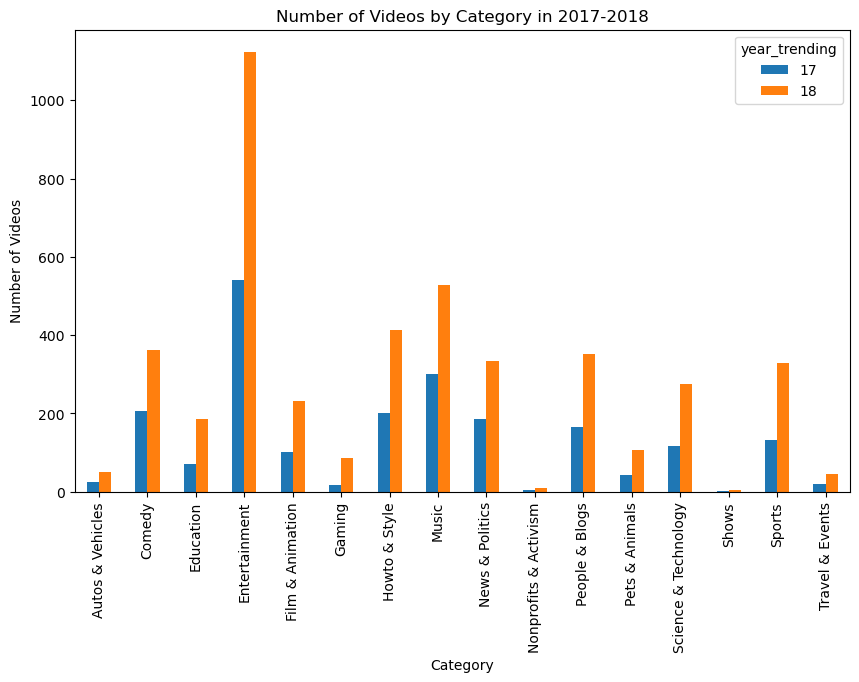

In [43]:
# Bar graph to compare between years
grouped = new_usvideos.groupby(['category_name', 'year_trending'])['video_id'].nunique().reset_index()
pivot = grouped.pivot(index='category_name', columns='year_trending', values='video_id')
pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.title('Number of Videos by Category in 2017-2018')
plt.show